In [272]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix,accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import pipeline

import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('D:\Data Analysis\Language Detection\Language Detection.csv')
df.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [273]:
print('{} rows and {} columns'.format(df.shape[0],df.shape[1]))

10337 rows and 2 columns


In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10337 entries, 0 to 10336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10337 non-null  object
 1   Language  10337 non-null  object
dtypes: object(2)
memory usage: 161.6+ KB


In [275]:
df.columns

Index(['Text', 'Language'], dtype='object')

In [276]:
df.isna().sum().any()

False

In [277]:
df.sample(5)

,Text,Language
8874,jag är rädd att jag gör det.,Sweedish
4539,kun je het herhalen omdat ik het laatste woord...,Dutch
10267,ಅದು ಏನೂ ಅಲ್ಲ.,Kannada
2001,सब कुछ होने से पहले आप उन्हें उठाने के लिए क्य...,Hindi
7691,scusa se ti interrompo.,Italian


In [278]:
lang_count=df['Language'].value_counts().sort_values(ascending=False).reset_index()
lang_count

,index,Language
0,English,1385
1,French,1014
2,Spanish,819
3,Portugeese,739
4,Italian,698
5,Russian,692
6,Sweedish,676
7,Malayalam,594
8,Dutch,546
9,Arabic,536


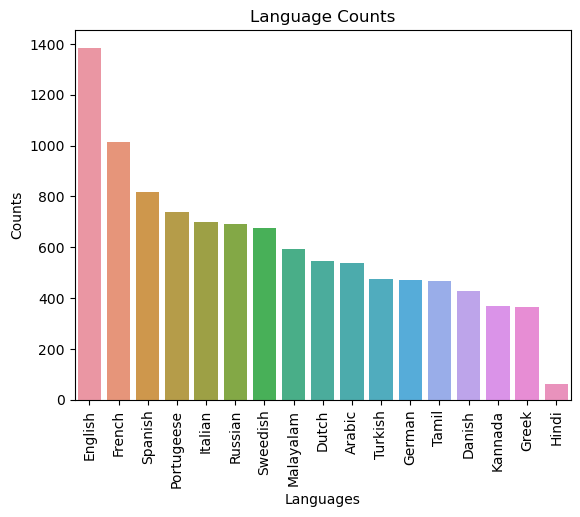

In [279]:
sns.barplot(lang_count['index'],lang_count['Language'])
plt.xlabel('Languages')
plt.ylabel('Counts')
plt.title('Language Counts')
plt.xticks(rotation=90)
plt.show()

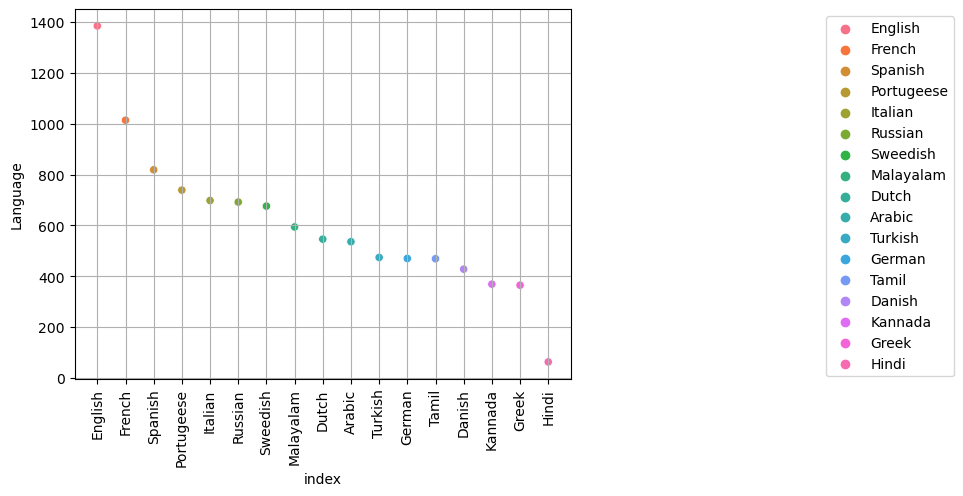

In [280]:
sns.scatterplot(lang_count['index'],lang_count['Language'],hue=lang_count['index'])
plt.xticks(rotation=90)
plt.grid()
plt.legend(bbox_to_anchor=(1.5,1), loc='upper left')
plt.show()

In [281]:
df[df['Language']=='Malayalam'].sample(5)

,Text,Language
1483,"പറയിപെറ്റ പന്തിരുകുലം, ഇബ്സൻ, തുടങ്ങിയ ലേഖനങ്ങ...",Malayalam
1727,ഇത് പ്രശ്നമല്ലെന്ന് തോന്നുന്നു.,Malayalam
1550,സ്കൂൾ കുട്ടികൾ മുതൽ ശാസ്ത്രജ്ഞന്മാർ വരെ വിക്കി...,Malayalam
1685,എങ്ങനെ പോകുന്നു?.,Malayalam
1961,മാണിക്യത്തിന്റെ സലാഡുകളും അതിനു മുകളിലുള്ള റൊട...,Malayalam


In [282]:
df[df['Language']=='Hindi'].sample(5)

,Text,Language
1985,"यह परियोजना के बारे में बार बार, अक्सर अन्य वे...",Hindi
1995,इस दुनिया में कोई भी किसी भी विषय के बारे में ...,Hindi
2018,क्या आपको पता होगा कि पुस्तकालय कहाँ है?,Hindi
1983,[60] कुछ आलोचकों का दावा है कि विकिपीडिया की ख...,Hindi
2001,सब कुछ होने से पहले आप उन्हें उठाने के लिए क्य...,Hindi


In [283]:
# remove symbols and numbers specified in the function
def remove_sym_num(text):
    text=re.sub(r'[{}]'.format(string.punctuation),'',text)
    text=re.sub(r'\d+','',text)
    text=re.sub(r'[@]','',text)
    return text.lower()

In [284]:
#remove english letters specified in the function
def remove_eng(text):
    text=re.sub(r'[a-zA-Z]+','',text)
    return text.lower()

In [285]:
x1=df.apply(lambda x:remove_eng(x.Text) if x.Language in ['Russia','Malayalam','Hindi','Kannada','Tamil','Arabic'] else x.Text,axis=1)
x1

0         Nature, in the broadest sense, is the natural...
1        "Nature" can refer to the phenomena of the phy...
2        The study of nature is a large, if not the onl...
3        Although humans are part of nature, human acti...
4        [1] The word nature is borrowed from the Old F...
                               ...                        
10332    ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...
10333    ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...
10334    ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...
10335    ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...
10336    ಟೆರ್ರಿ ನೀವು ನಿಜವಾಗಿಯೂ ಆ ದೇವದೂತನಂತೆ ಸ್ವಲ್ಪ ಕಾಣು...
Length: 10337, dtype: object

In [286]:
x=x1.apply(remove_sym_num)
x

0         nature in the broadest sense is the natural p...
1        nature can refer to the phenomena of the physi...
2        the study of nature is a large if not the only...
3        although humans are part of nature human activ...
4         the word nature is borrowed from the old fren...
                               ...                        
10332    ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...
10333    ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...
10334    ಹೇಗೆ  ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎಲ...
10335    ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...
10336    ಟೆರ್ರಿ ನೀವು ನಿಜವಾಗಿಯೂ ಆ ದೇವದೂತನಂತೆ ಸ್ವಲ್ಪ ಕಾಣು...
Length: 10337, dtype: object

In [287]:
y=df['Language']
y

0        English
1        English
2        English
3        English
4        English
          ...   
10332    Kannada
10333    Kannada
10334    Kannada
10335    Kannada
10336    Kannada
Name: Language, Length: 10337, dtype: object

In [288]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
x_train

5967    τώρα αργότερα η μέλι και ο τέρι έσπασαν αντίο ...
3570                            améliorezle ou discutezen
7607    non ne vale la pena personalmente amo la frase...
3080    tente copiar minha pronúncia exatamente inclui...
828     if the complexity of the model is increased in...
                              ...                        
5734    σε μια αγγλόφωνη χώρα μπορείτε να το χρησιμοπο...
5191    las conexiones tienen pesos numéricos que se a...
5390    si alguien te pregunta si estás cansado y quie...
860     due to its generality the field is studied in ...
7270    sono disponibili inoltre applicazioni dedicate...
Length: 8269, dtype: object

In [289]:
vectorizer=TfidfVectorizer(ngram_range=(1,3),analyzer='char')

In [290]:
# Defininf a pipeline
model=pipeline.Pipeline([
    ('vectorizer',vectorizer),
    ('clf',LogisticRegression())])

Accuracy Score: 0.9835589941972921


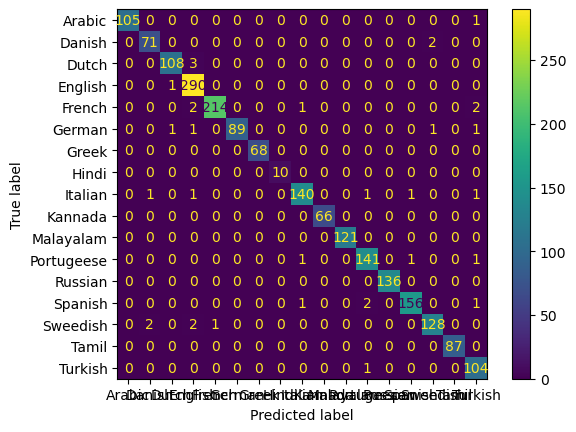

In [291]:
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
acc=accuracy_score(y_test,y_pred)
cmd=ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
print('Accuracy Score:',acc)
cmd

In [292]:
print('Accuracy Score:',acc)

Accuracy Score: 0.9835589941972921


In [293]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Arabic       1.00      0.99      1.00       106
      Danish       0.96      0.97      0.97        73
       Dutch       0.98      0.97      0.98       111
     English       0.97      1.00      0.98       291
      French       1.00      0.98      0.99       219
      German       1.00      0.96      0.98        93
       Greek       1.00      1.00      1.00        68
       Hindi       1.00      1.00      1.00        10
     Italian       0.98      0.97      0.97       145
     Kannada       1.00      1.00      1.00        66
   Malayalam       1.00      1.00      1.00       121
  Portugeese       0.97      0.98      0.98       144
     Russian       1.00      1.00      1.00       136
     Spanish       0.99      0.97      0.98       160
    Sweedish       0.98      0.96      0.97       133
       Tamil       1.00      1.00      1.00        87
     Turkish       0.94      0.99      0.96       105

    accuracy              

In [294]:
def prd(text):
    lang=model.predict([text])
    print('The language is in: ',lang[0])

In [295]:
prd("LANGUAGE DETECTION MODEL CHECK")
prd("VÉRIFICATION DU MODÈLE DE DÉTECTION DE LA LANGUE")
prd("توففحص نموذج الكشف عن اللغة")
prd("VERIFICACIÓN DEL MODELO DE DETECCIÓN DE IDIOMAS")
prd("ലാംഗ്വേജ് ഡിറ്റക്ഷൻ മോഡൽ ചെക്ക്")
prd("ПРОВЕРКА МОДЕЛИ ОПРЕДЕЛЕНИЯ ЯЗЫКА")
prd('भाषा का पता लगाने वाले मॉडल की जांच')
prd(' boyit9h एनालिटिक्स alhgserog 90980879809 bguytfivb ahgseporiga प्रदान करता है')

The language is in:  English
The language is in:  French
The language is in:  Arabic
The language is in:  Spanish
The language is in:  Malayalam
The language is in:  Russian
The language is in:  Hindi
The language is in:  Hindi


In [296]:
prd('അത് എവിടെയെങ്കിലും ഒരു ചുവന്ന ബട്ടൺ ഉണ്ട്.')

The language is in:  Malayalam


In [297]:
model2=pipeline.Pipeline([
    ('vectorizer',vectorizer),
    ('clf',MultinomialNB())])

Accuracy Score: 0.851063829787234


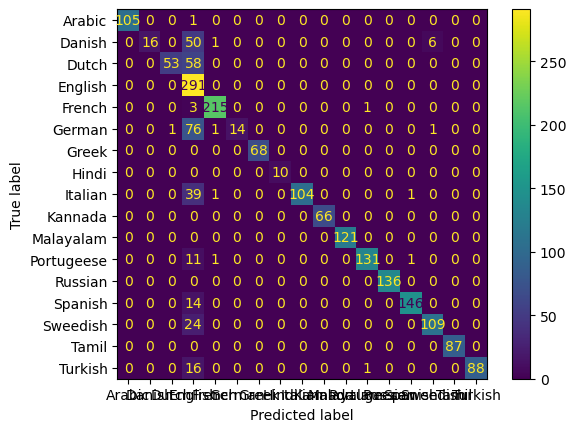

In [298]:
model2.fit(x_train,y_train)
y_pred=model2.predict(x_test)
acc=accuracy_score(y_test,y_pred)
cmd=ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
print('Accuracy Score:',acc)
cmd

In [299]:
def prd(text):
    lang=model2.predict([text])
    print('The language is in: ',lang[0])

In [300]:
prd("ПРОВЕРКА МОДЕЛИ ОПРЕДЕЛЕНИЯ ЯЗЫКА")
prd('भाषा का पता लगाने वाले मॉडल की जांच')

The language is in:  Russian
The language is in:  Hindi


<ul>The above analysis concludes that the Logestic Regression provide much better accuracy score than the MultinomialNB.</ul>